# Exercise 21 : Cohen-Sutherland Clipping
Using the Cohen-Sutherland algorithm, clip the segment (s 1 ; e 1 ) and (s 2 ; e 2 ). The clipping phase must be processed in order : BOTTOM , TOP , LEFT and RIGHT .

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
class Figure(object):
    def __init__(self):
        _, self.ax = plt.subplots()

    def draw(self):
        self.ax.axis((0, 40, 0, 30))
        self.ax.set_aspect(1)
        plt.show()
        
    def draw_polygon(self, points, linewidth=1, edgecolor='#000000'):
        polygon = Polygon(points, True, linewidth=linewidth, edgecolor=edgecolor, facecolor='#FFFFFF')
        self.ax.add_patch(polygon)
    
    def draw_point(self, p, color='red'):
        self.ax.plot(p[0], p[1], marker='o', markersize=3, color=color)

def draw_outline(fig):
    fig.draw_polygon([(10, 0), (10, 30)])
    fig.draw_polygon([(30, 0), (30, 30)])
    fig.draw_polygon([(0, 20), (40, 20)])
    fig.draw_polygon([(0, 10), (40, 10)])

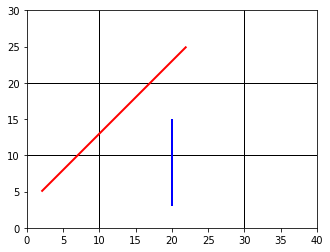

In [3]:
s1 = [2, 5]
e1 = [22, 25]
s2 = [20, 15]
e2 = [20, 3]

fig = Figure()
draw_outline(fig)
fig.draw_polygon([s1, e1], linewidth=2, edgecolor='#FF0000')
fig.draw_polygon([s2, e2], linewidth=2, edgecolor='#0000FF')
fig.draw()

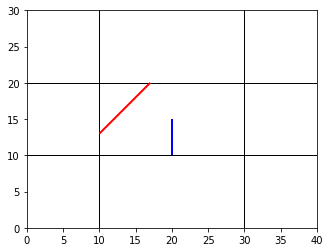

In [4]:
from enum import Enum, unique

@unique
class Segment(Enum):
    TOP = 1
    BOTTOM = 2
    LEFT = 3
    RIGHT = 4
    

VIEWPORT_LEFT = 10
VIEWPORT_RIGHT = 30
VIEWPORT_TOP = 20
VIEWPORT_BOTTOM = 10
    
def get_segments(point):
    # left column
    if point[0] < VIEWPORT_LEFT:
        if point[1] > VIEWPORT_TOP:
            return {Segment.LEFT, Segment.TOP}
        elif VIEWPORT_TOP > point[1] > VIEWPORT_BOTTOM:
            return {Segment.LEFT}
        elif point[1] < VIEWPORT_BOTTOM:
            return {Segment.LEFT, Segment.BOTTOM}
        else:
            raise AssertionError()
    
    # middle column:
    if VIEWPORT_LEFT < point[0] < VIEWPORT_RIGHT:
        if point[1] > VIEWPORT_TOP:
            return {Segment.TOP}
        elif VIEWPORT_TOP > point[1] > VIEWPORT_BOTTOM:
            # center
            return set()
        elif point[1] < VIEWPORT_BOTTOM:
            return {Segment.BOTTOM}
        else:
            raise AssertionError()

    # left column:
    if point[0] > VIEWPORT_TOP:
        return {Segment.RIGHT, Segment.TOP}
    elif VIEWPORT_TOP > point[1] > VIEWPORT_BOTTOM:
        return {Segment.RIGHT}
    elif point[1] < VIEWPORT_BOTTOM:
        return {Segment.RIGHT, Segment.BOTTOM}
    else:
        raise AssertionError()

def clip(point, segments, slope):
    if Segment.TOP in segments:
        diff = point[1] - VIEWPORT_TOP
        point[1] = VIEWPORT_TOP
        point[0] = point[0] - diff * slope
    if Segment.BOTTOM in segments:
        diff = VIEWPORT_BOTTOM - point[1]
        point[1] = VIEWPORT_BOTTOM
        point[0] = point[0] + diff * slope
    if Segment.LEFT in segments:
        diff = point[0] - VIEWPORT_LEFT
        point[0] = VIEWPORT_LEFT
        point[1] = point[1] - diff * slope
    if Segment.RIGHT in segments:
        diff = VIEWPORT_RIGHT - point[0]
        point[0] = VIEWPORT_RIGHT
        point[1] = point[1] + diff * slope
    return point

def cohen_sutherland(p1, p2):
    segments1 = get_segments(p1)
    segments2 = get_segments(p2)
    
    union = segments1 | segments2
    
    # all points are inside the viewport, no clipping required
    if len(union) == 0:
        return p1, p2
    
    intersection = segments1 & segments2

    x = p2[0] - p1[0]
    y = p2[1] - p1[1]
    slope = x / y
    
    # line is not inside viewport, do not draw
    if len(intersection) > 0:
        return None, None
    
    # clip
    return clip(p1, segments1, slope), clip(p2, segments2, slope)

s1 = [2, 5]
e1 = [22, 25]
s2 = [20, 15]
e2 = [20, 3]

e1, s1 = cohen_sutherland(e1, s1)
e2, s2 = cohen_sutherland(e2, s2)

fig = Figure()
draw_outline(fig)
if s1 and e1:
    fig.draw_polygon([s1, e1], linewidth=2, edgecolor='#FF0000')
if s2 and e2:
    fig.draw_polygon([s2, e2], linewidth=2, edgecolor='#0000FF')
fig.draw()
